Practical: 02
Asita Ganatra, 22070521003

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing # Import California housing dataset
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler

# Load dataset
housing = fetch_california_housing() # Load California housing dataset
df = pd.DataFrame(housing.data, columns=housing.feature_names)
df['PRICE'] = housing.target  # Add target column

print("First 5 rows of dataset:\n", df.head())

First 5 rows of dataset:
    MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  PRICE  
0    -122.23  4.526  
1    -122.22  3.585  
2    -122.24  3.521  
3    -122.25  3.413  
4    -122.25  3.422  


In [ ]:
#Check for Missing Values
print("\nNull values in dataset:\n", df.isnull().sum())



Null values in dataset:
 MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
PRICE         0
dtype: int64


In [ ]:
# Introduce missing values artificially for demonstration
df.loc[5:15, 'HouseAge'] = np.nan

print("\nNull values after inserting missing values:\n", df.isnull().sum())

# Mean imputation
imputer = SimpleImputer(strategy='mean')
df[['HouseAge']] = imputer.fit_transform(df[['HouseAge']])

print("\nNull values after imputation:\n", df.isnull().sum())



Null values after inserting missing values:
 MedInc         0
HouseAge      11
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
PRICE          0
dtype: int64

Null values after imputation:
 MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
PRICE         0
dtype: int64


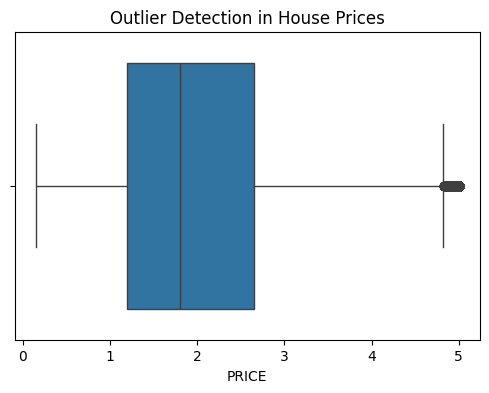

In [ ]:
# Boxplot for PRICE to detect outliers
plt.figure(figsize=(6,4))
sns.boxplot(x=df['PRICE'])
plt.title("Outlier Detection in House Prices")
plt.show()

#The boxplot shows the distribution of house prices.
#The box represents the interquartile range (IQR), and the whiskers extend to 1.5 × IQR.
#Points beyond whiskers represent outliers (extremely high or low house prices).

In [ ]:
# Add a categorical column for demonstration (Region type: Urban, Suburban, Rural)
df['Region'] = np.random.choice(['Urban', 'Suburban', 'Rural'], size=len(df))

# Apply Label Encoding
encoder = LabelEncoder()
df['Region_encoded'] = encoder.fit_transform(df['Region'])

print("\nSample categorical encoding:\n", df[['Region', 'Region_encoded']].head())



Sample categorical encoding:
      Region  Region_encoded
0     Rural               0
1  Suburban               1
2     Rural               0
3     Urban               2
4     Rural               0


In [ ]:
# Select numerical columns
num_cols = ['MedInc', 'HouseAge', 'AveRooms', 'AveOccup', 'PRICE']

# Standardization (mean=0, std=1)
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

print("\nAfter Standardization:\n", df[num_cols].head())

# Normalization (0-1 range)
scaler_minmax = MinMaxScaler()
df_minmax = pd.DataFrame(scaler_minmax.fit_transform(df[num_cols]), columns=num_cols)

print("\nAfter Normalization:\n", df_minmax.head())



After Standardization:
      MedInc  HouseAge  AveRooms  AveOccup     PRICE
0  2.344766  0.983922  0.628559 -0.049597  2.129631
1  2.332238 -0.606590  0.327041 -0.092512  1.314156
2  1.782699  1.858703  1.155620 -0.025843  1.258693
3  0.932968  1.858703  0.156966 -0.050329  1.165100
4 -0.012881  1.858703  0.344711 -0.085616  1.172900

After Normalization:
      MedInc  HouseAge  AveRooms  AveOccup     PRICE
0  0.539668  0.784314  0.043512  0.001499  0.902266
1  0.538027  0.392157  0.038224  0.001141  0.708247
2  0.466028  1.000000  0.052756  0.001698  0.695051
3  0.354699  1.000000  0.035241  0.001493  0.672783
4  0.230776  1.000000  0.038534  0.001198  0.674638


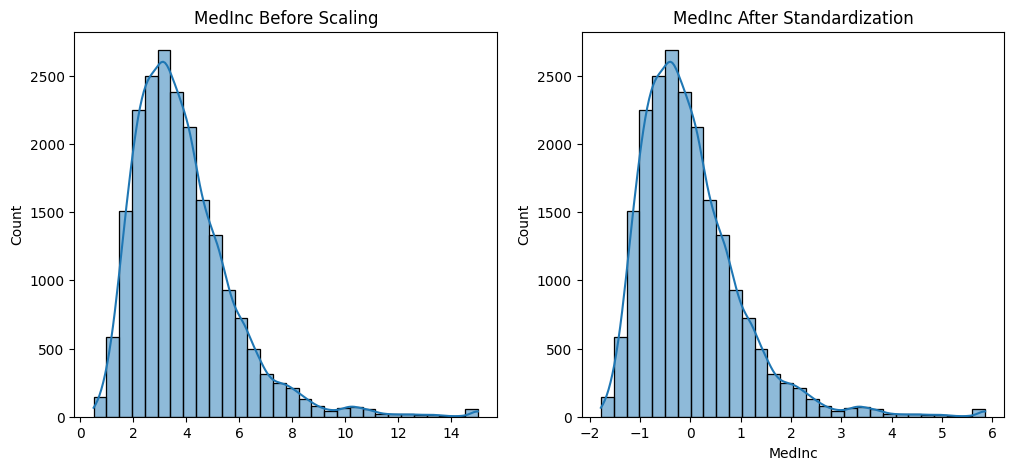

In [ ]:
# Histogram before scaling
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(housing.data[:,0], bins=30, kde=True)  # MedInc before scaling
plt.title("MedInc Before Scaling")

# Histogram after scaling
plt.subplot(1,2,2)
sns.histplot(df['MedInc'], bins=30, kde=True)  # MedInc after scaling
plt.title("MedInc After Standardization")
plt.show()

#Histogram of Median Income (Before Scaling)

#Shows the natural distribution of the MedInc feature before applying scaling.
#It is skewed towards lower values, with some households having significantly higher incomes.
#The variation in scale makes it unsuitable for direct model training.

#Histogram of Median Income (After Standardization)

#Displays the distribution of the MedInc feature after applying StandardScaler.
#The data is transformed to have mean = 0 and standard deviation = 1.
#This transformation ensures that the feature contributes equally when compared with other scaled features.